### 1. t检验



#### 1.1 单样本t检验

In [8]:
from scipy import stats
import numpy as np

# 准备数据
sample = np.array([1, 2, 3, 4, 5])  # 样本数据
popmean = 3  # 假设的总体均值

# 执行单样本t检验
t_stat, p_value = stats.ttest_1samp(sample, popmean)

# 输出结果
print("t-statistic:", t_stat)
print("p-value:", p_value)

# 根据p值判断结果
if p_value < 0.05:
    print("The sample mean is significantly different from the population mean.")
else:
    print("There is no significant difference between the sample mean and the population mean.")

t-statistic: 0.0
p-value: 1.0
There is no significant difference between the sample mean and the population mean.


#### 1.2 两个独立样本T检验

In [ ]:
from scipy import stats
import numpy as np

# 准备数据
sample1 = np.array([1, 2, 3, 4, 5])
sample2 = np.array([2, 3, 4, 5, 6])

# 执行t检验
t_stat, p_value = stats.ttest_ind(sample1, sample2)

# 输出结果
print("t-statistic:", t_stat)
print("p-value:", p_value)

# 根据p值判断结果
if p_value < 0.05:
    print("There is a significant difference between the two samples.")
else:
    print("There is no significant difference between the two samples.")

####  1.3 配对样本T检验

In [9]:
from scipy import stats
import numpy as np

# 准备数据
sample1 = np.array([1, 2, 3, 4, 5])  # 第一次测量的结果
sample2 = np.array([1.1, 2.1, 2.9, 4.1, 5.1])  # 第二次测量的结果

# 执行配对样本t检验
t_stat, p_value = stats.ttest_rel(sample1, sample2)

# 输出结果
print("t-statistic:", t_stat)
print("p-value:", p_value)

# 根据p值判断结果
if p_value < 0.05:
    print("There is a significant difference between the two related samples.")
else:
    print("There is no significant difference between the two related samples.")

t-statistic: -1.4999999999999971
p-value: 0.20800000000000057
There is no significant difference between the two related samples.


### 2.方差分析

#### 2.1 单因素方差分析

In [10]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 假设我们有三组样本数据
data = {
    'group': ['group1']*5 + ['group2']*5 + ['group3']*5,
    'value': [85, 90, 88, 92, 87] + [78, 82, 84, 79, 80] + [92, 94, 96, 91, 95]
}
df = pd.DataFrame(data)

# 使用ols函数建立模型
model = ols('value ~ group', data=df).fit()

# 执行方差分析
anova_results = anova_lm(model, typ=2)

# 输出结果
print(anova_results)

              sum_sq    df          F    PR(>F)
group     428.133333   2.0  36.908046  0.000007
Residual   69.600000  12.0        NaN       NaN


### 3.卡方检验

In [12]:
from scipy.stats import chi2_contingency
import pandas as pd

# 假设我们有一个2x2的列联表，表示两个分类变量的频数
# 例如，观察值是两个变量的频数矩阵
# 变量1   | 变量2
# 正例    | 反例
# -------------------
# 100     | 50
# 80      | 70

# 创建一个2x2的列联表
observed = [[100, 50], [80, 70]]

# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(observed)

# 输出结果
print(f"Chi-squared: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(pd.DataFrame(expected, columns=['Variable 2 - Positive', 'Variable 2 - Negative'],
                  index=['Variable 1 - Positive', 'Variable 1 - Negative']))

Chi-squared: 5.01
P-value: 0.0251
Degrees of freedom: 1
Expected frequencies:
                       Variable 2 - Positive  Variable 2 - Negative
Variable 1 - Positive                   90.0                   60.0
Variable 1 - Negative                   90.0                   60.0


### 4 相关分析

#### 4.1 Pearson相关

##### 使用 Pandas

In [19]:
import pandas as pd

# 假设我们有两个变量的数据
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [5, 4, 3, 2, 1]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 计算皮尔逊相关系数
correlation = df['Variable1'].corr(df['Variable2'], method='pearson')

print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: -0.9999999999999999


##### 使用 Scipy

In [20]:
from scipy.stats import pearsonr

# 假设我们有两个变量的数据
variable1 = [1, 2, 3, 4, 5]
variable2 = [5, 4, 3, 2, 1]

# 计算皮尔逊相关系数和p值
correlation, p_value = pearsonr(variable1, variable2)

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -1.0
P-value: 0.0


#### 4.2   偏相关分析

In [22]:
import pandas as pd
import pingouin as pg

# 创建一个示例数据集
data = pd.DataFrame({
    'currentGrade': [82, 88, 75, 74, 93, 97, 83, 90, 90, 80],
    'hours': [4, 3, 6, 5, 4, 5, 8, 7, 4, 6],
    'examScore': [88, 85, 76, 70, 92, 94, 89, 85, 90, 93],
})

# 计算偏相关系数，控制'currentGrade'的影响
partial_corr_result = pg.partial_corr(data=data, x='hours', y='examScore', covar='currentGrade')

# 输出结果
print(partial_corr_result)

          n         r          CI95%     p-val
pearson  10  0.190626  [-0.54, 0.76]  0.623228


### 5.线性回归

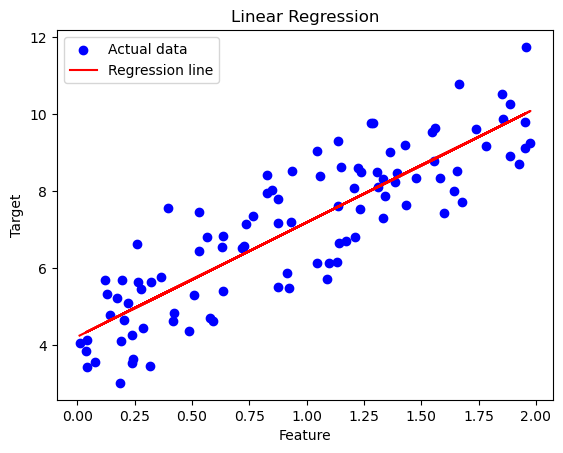

Intercept: 4.222151077447232
Coefficient: 2.968467510701018
Mean Squared Error: 0.9924386487246482
R^2 Score: 0.7469629925504755


In [28]:
# 导入必要的库
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 生成合成数据
np.random.seed(0)  # 为了结果的可重复性
X = 2 * np.random.rand(100, 1)  # 100个样本点，每个样本1个特征
y = 4 + 3 * X + np.random.randn(100, 1)  # 线性关系 y = 4 + 3x + 噪声

# 将数据转换为DataFrame
df = pd.DataFrame(X, columns=['Feature'])
df['Target'] = y

# 创建线性回归模型实例
model = LinearRegression()

# 准备特征矩阵X和目标变量Y
X = df[['Feature']]  # 特征矩阵需要是二维的
Y = df['Target']   # 目标变量可以是一维的

# 拟合模型
model.fit(X, Y)

# 进行预测
Y_pred = model.predict(X)

# 可视化结果
plt.scatter(X, Y, color='blue', label='Actual data')  # 绘制实际数据点
plt.plot(X, Y_pred, color='red', label='Regression line')  # 绘制回归线
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# 查看模型参数
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# 评估模型性能
from sklearn.metrics import mean_squared_error, r2_score

# 计算均方误差和R^2分数
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

### 6. 逻辑回归

Data:
   Feature1  Feature2  Target
0         1         1       0
1         2         2       0
2         2         3       0
3         3         4       0
4         4         2       1
5         5         5       1
6         5         6       1
7         6         7       1
8         7         8       1
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



u:\Users\Enlink\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


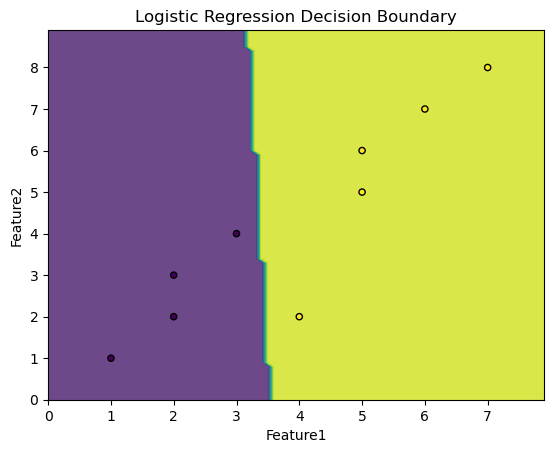

In [ ]:

# 导入必要的库
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 创建数据
data = {
    'Feature1': [1, 2, 2, 3, 4, 5, 5, 6, 7],
    'Feature2': [1, 2, 3, 4, 2, 5, 6, 7, 8],
    'Target': [0, 0, 0, 0, 1, 1, 1, 1, 1]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 查看数据
print("Data:")
print(df)

# 准备特征矩阵X和目标变量Y
X = df[['Feature1', 'Feature2']]  # 特征矩阵需要是二维的
Y = df['Target']  # 目标变量可以是一维的

# 划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 创建逻辑回归模型实例
model = LogisticRegression()

# 拟合模型
model.fit(X_train, Y_train)

# 进行预测
Y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

# 打印混淆矩阵
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 打印分类报告
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)

# 可视化决策边界（仅适用于2D特征）
if X.shape[1] == 2:
    x_min, x_max = X['Feature1'].min() - 1, X['Feature1'].max() + 1
    y_min, y_max = X['Feature2'].min() - 1, X['Feature2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X['Feature1'], X['Feature2'], c=Y, edgecolors='k', s=20)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

### 7. 生存分析 

Median survival time: 40.0, with 95% confidence interval:      KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                     5.0                    50.0
Log-rank test results:
<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.91 0.03      5.23


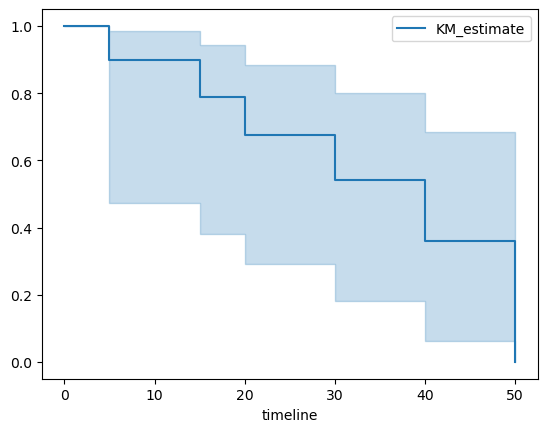

In [29]:
# 导入必要的库
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines.utils import median_survival_times

# 创建示例数据
data = {
    'PatientID': range(1, 11),
    'Time': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],  # 生存时间
    'Event': [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]  # 事件是否发生（1为发生，0为删失）
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 初始化Kaplan-Meier生存函数估计器
kmf = KaplanMeierFitter()

# 使用数据进行生存分析
kmf.fit(df['Time'], event_observed=df['Event'])

# 绘制生存曲线
kmf.plot_survival_function()
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(f"Median survival time: {median_}, with 95% confidence interval: {median_confidence_interval_}")

# 执行Log-rank检验
# 假设我们有两个组，这里我们简单地将数据分为两组进行演示
group_1 = df[:5]
group_2 = df[5:]

# 拟合两个组的生存曲线
kmf_1 = KaplanMeierFitter().fit(group_1['Time'], event_observed=group_1['Event'])
kmf_2 = KaplanMeierFitter().fit(group_2['Time'], event_observed=group_2['Event'])

# 执行Log-rank检验
results = logrank_test(group_1['Time'], group_2['Time'], event_observed_A=group_1['Event'], event_observed_B=group_2['Event'])
print("Log-rank test results:")
print(results)

# 显示图表

### 8.主成因分析 

#### 8.1 主成因分析

降维后的数据:
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.661

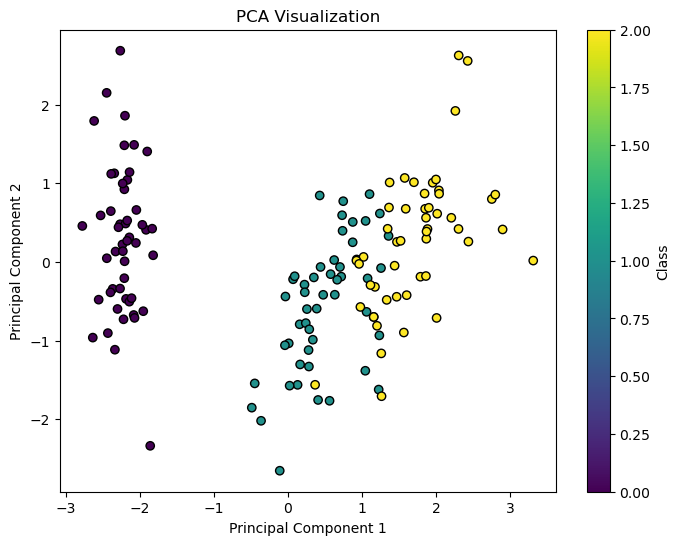

In [30]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 创建PCA对象，指定降维后的维度为2
pca = PCA(n_components=2)

# 对数据集进行PCA分析
X_pca = pca.fit_transform(X_scaled)

# 输出降维后的数据
print("降维后的数据:")
print(X_pca)

# 可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Class')
plt.show()

#### 8.2 因子分析

In [32]:
import pandas as pd
from sklearn import datasets
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

# 加载鸢尾花数据集
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 数据标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=iris.feature_names)

# 初始化因子分析对象，这里我们假设需要提取2个因子
fa = FactorAnalyzer(n_factors=2, rotation='varimax')

# 拟合因子分析模型
fa.fit(df_scaled)

# 查看公因子方差，即每个变量的方差被因子解释的比例
communalities = fa.get_communalities()
print("公因子方差:\n", communalities)

# 查看成分矩阵，即因子载荷矩阵
loadings = fa.loadings_
print("\n成分矩阵:\n", loadings)

# 查看解释的总方差
total_variance = fa.get_factor_variance()
print("\n解释的总方差（即贡献率）:\n", total_variance)

# 计算因子得分
factor_scores = fa.transform(df_scaled)
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor{i+1}' for i in range(fa.n_factors)])
print("\n因子得分:\n", factor_scores_df.head())

公因子方差:
 [0.81249138 0.99520493 1.01060002 0.90338341]

成分矩阵:
 [[ 0.90120548  0.01789008]
 [-0.15041281  0.98619517]
 [ 0.96415345 -0.28461929]
 [ 0.92140124 -0.23324486]]

解释的总方差（即贡献率）:
 (array([2.61336746, 1.10831228]), array([0.65334187, 0.27707807]), array([0.65334187, 0.93041994]))

因子得分:
     Factor1   Factor2
0 -1.157234  0.851609
1 -1.583209 -0.384376
2 -1.434077  0.110196
3 -1.302248 -0.088663
4 -1.032635  1.109801
